In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Dimenssions du de la plaque
Lx = 100
Ly = 80

# Nombre de neuds
Nx = 50
Ny = 50

# Pas du maillage
dx, dy = Lx / (Nx-1), Ly / (Ny-1)

# Maillage de la barre
x = np.zeros((Nx, Ny))
y = np.zeros((Nx, Ny))
for i in range(Nx):
    for j in range(Nx):
        x[i, j] = i*dx
        y[i, j] = j*dx

# Iitialization des tableaux T et Tnew à l'iteration n et n(n+1) de Jacobi
T = np.zeros((Nx, Ny))
Tnew = np.zeros((Nx, Ny))

# Conditions limites
Ts, Te = 0, 0
Tn = 10
To = 20

# Bord Sud
T[:, 0] = Ts
# Bord Nord
T[:,-1] = Tn
# Bord Ouest
T[0, :] = To
# Bord Est
T[-1,:] = Te

Err = 1
seuil = 1.e-4

In [11]:
coef = 0.5 / (dx**2 + dy**2)

In [12]:
k = 0
while (Err > seuil):
    for i in range(1, Nx-1):
        for j in range(1, Ny-1):
            T[i, j] = coef * ((dy**2 * (T[i-1, j] + T[i+1, j])) + (dx**2 * (T[i, j-1] + T[i, j+1])))
    Err = np.linalg.norm(Tnew - T)
    k += 1
    Tnew = T.copy()
    # print(Err)

print("NOMBRE D'ITERRATION DE JACOBI: ", k)

NOMBRE D'ITERRATION DE JACOBI:  2270


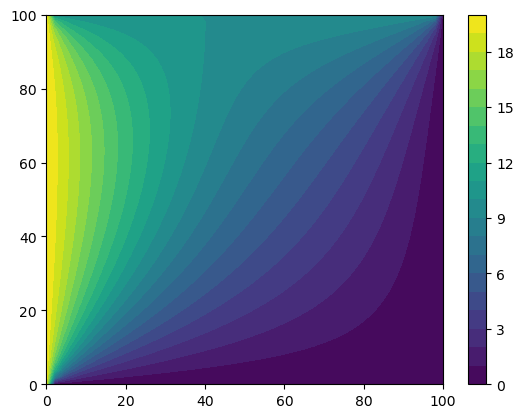

In [13]:
# Contour plot
graph = plt.contourf(x, y, T, 20)
plt.colorbar()

<a list of 20 text.Text objects>

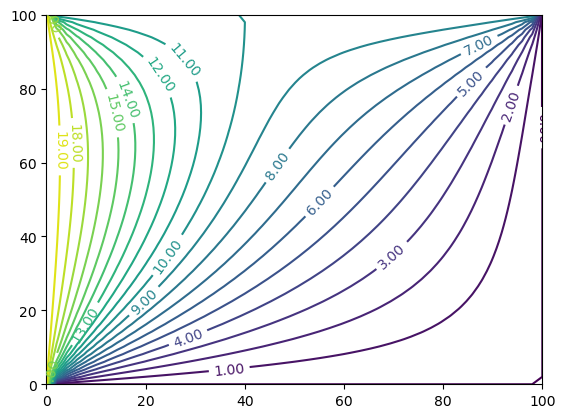

In [14]:
graph = plt.contour(x, y, T, 20)
plt.clabel(graph, inline=True, fontsize=10, fmt="%3.2f")